In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
data=df.transposepose()
data.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


### confidence Interval 

   **DEFINITION**
 - The confidence interval is the range of values that you expect your estimate to fall between a certain percentage of the time if you run your experiment again or re-sample the population in the same way.

 - The confidence level is the percentage of times you expect to reproduce an estimate between the upper and lower bounds of the confidence interval, and is set by the alpha value.

for a population Mean when population std is known 
suppose the population has a probability distribution with a mean of 3. and a standard divation of Squar[3.5]=1.87 if a random of size is 5 is taken from this population the 95% confidence interval willrun from 

$\bar{x} - 1.96\frac{StdOfSample}{\sqrt{lengthOf Sample}}$ to 
$\bar{x} + 1.96\frac{StdOfSample}{\sqrt{lengthOf Sample}}$
- from this defnition we are going to get the confidence interval of the dataset 


In [14]:
# In probability and statistics, 1.96 is the approximate value of the 97.5 percentile point of the normal distribution.
# 95% of the area under a normal curve lies within roughly 1.96 standard deviations of the mean, and due to the central
# limit theorem, this number is therefore used in the construction of approximate 95% confidence intervals.
import math
mean = list(data.mean())
std = list(data.std())
CI = [] # CI stands for convidence interval
for i in range (4) :
    CI.append(1.96*(std[i]/math.sqrt(len(data))))
    
CI  

[6508.897969970325, 3192.2543136890313, 4553.902287088243, 2263.8517443103765]

lets ceate a data frame that holds the difference from nearest  sign and shade 

In [15]:
nearest = 100
Y = 42500
df_p = pd.DataFrame()
df_p['diff'] = nearest*((Y - data.mean())//nearest)
df_p['sign'] = df_p['diff'].abs()/df_p['diff']

old_range = abs(df_p['diff']).min(), df_p['diff'].abs().max()

new_range = .5,1

df_p['shade'] = df_p['sign']*np.interp(df_p['diff'].abs(), old_range, new_range)

In [16]:
df_p

,diff,sign,shade
1992,9100.0,1.0,1.000000
1993,600.0,1.0,0.500000
1994,3000.0,1.0,0.641176
1995,-5300.0,-1.0,-0.776471


In [17]:
shade=list(df_p['shade'])

In [18]:
from matplotlib import cm
blues = cm.Blues
reds = cm.Reds
# using shades blues when diff is pos
# using Reds when when diff is neg
color = ['White' if  x == 0 else reds(abs(x))
         if x<0 else blues(abs(x)) for x in shade]

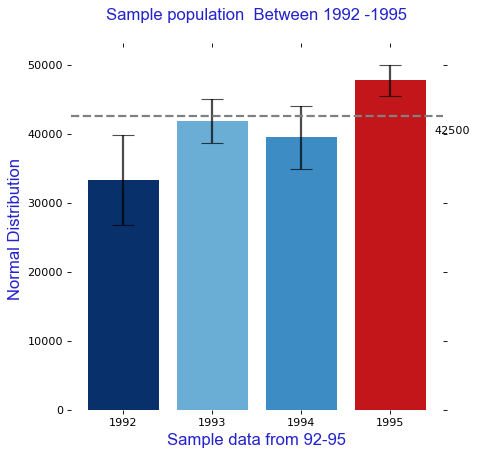

In [54]:
m